## 1-Preprocessing part

In [312]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [313]:
df=pd.read_csv('titanic-passengers.csv',sep=';',skipinitialspace=True)
df = df.reset_index()
df.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [314]:
df


,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    object 
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [316]:
df.isnull().sum().sum()

866

we have 866 NaN data that we have to either drop or replace

In [317]:
df.isnull().sum()

index            0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We only have 3 columns to deal with. Which are Age, Cabin and Emabrked.

In [318]:
df['Age'].fillna(df['Age'].median(),inplace=True) 
# we are replacing the missing values in the column Age with the median value  

In [319]:
df.isnull().sum()

index            0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have now no more missing values in the column Age

In [320]:
print(df['Embarked'].value_counts())
#we are going to replace the 2 missing values with the most common value.
#The method value_counts indicates us which is the most common value .Which is the value 'S'


S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [321]:
df['Embarked'].fillna('S',inplace=True)#we replaced the missing value by 'S'in the column 'Embarked'

In [322]:
df.isnull().sum()

index            0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

The column Embarked has now no more missing values. We are going to now deal with the Cabin column

In [323]:
print(df['Cabin'].value_counts())

C23 C25 C27    4
G6             4
B96 B98        4
E101           3
C22 C26        3
              ..
A6             1
C95            1
F G63          1
B73            1
C103           1
Name: Cabin, Length: 147, dtype: int64


As we can see the cabin column has 678 missing values which represents 76% of the columns values. When we look at the value.count() method we can't distinguish any clear common value. We then can't replace the missing values with the most common value.


In [324]:
df.dropna(axis=1,how='any')

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
887,887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,C
888,888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,S
889,889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,28.0,0,0,349215,7.8958,S


There are no correlation between ticket and cabin. We then can't fill the missing values in the column Cabin. We are then forced to dropped the column.

In [325]:
df1=df.copy()
encoder=LabelEncoder()
df1['Sex']=encoder.fit_transform(df['Sex'])
df1['Embarked']=encoder.fit_transform(df['Embarked'])
df1

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,343,No,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,NaN,2
1,1,76,No,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,2
2,2,641,No,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,NaN,2
3,3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,NaN,2
4,4,672,No,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,0
887,887,61,No,3,"Sirayanian, Mr. Orsen",1,22.0,0,0,2669,7.2292,NaN,0
888,888,535,No,3,"Cacic, Miss. Marija",0,30.0,0,0,315084,8.6625,NaN,2
889,889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,28.0,0,0,349215,7.8958,NaN,2


## 2- Visualization part

We are going to study the distribution of Sex and Age. They seems to be the most important features, Woman,children and the elders are the priority to be rescued. We can also Take a look at fare, Wealthy people may have survived due to their influence. We will also look at the distribution of the column survived being our target.


(array([0, 1]), <a list of 2 Text xticklabel objects>)

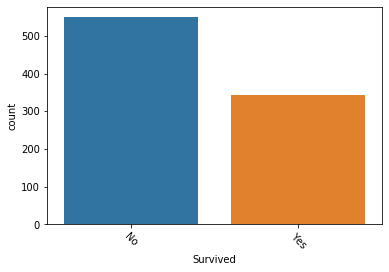

In [326]:
sns.countplot(x='Survived',data=df)
plt.xticks(rotation=-45)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

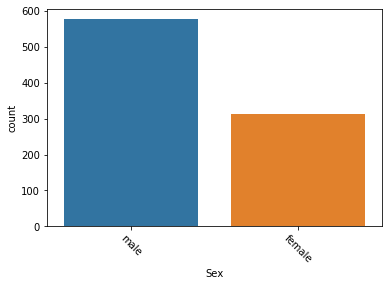

In [327]:
sns.countplot(x='Sex',data=df)
plt.xticks(rotation=-45)

If we compare both Bar plots we can see that there is kind of a relation between the survivors and the number of females. There are aprroximately 350 survivors and we have arround 300 female passengers. 

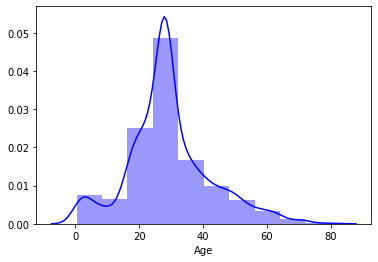

In [328]:
sns.distplot(df['Age'],bins=10,hist=True,kde=True ,color='blue')

Most of the passengers seem to be between the Age of 20 and 40. We have a few elders and children.

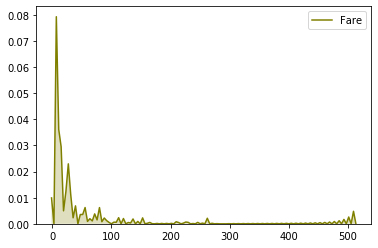

In [329]:
sns.kdeplot(df['Fare'], shade=True, bw=.5, color="olive")


If we look at this density plot we can see that most of the passengers have approximately a similar fare.

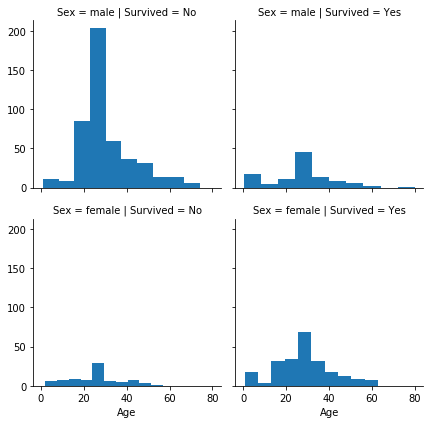

In [330]:
grid=sns.FacetGrid(df, row='Sex', col='Survived')
grid.map(plt.hist,'Age')
grid.add_legend()

By analysing the histogram, we can see clearly see that most females survived while most men didnt. We can also see that passengers below 10 have also most likely survived. The survived children seems a lot higher than the children that didn't 

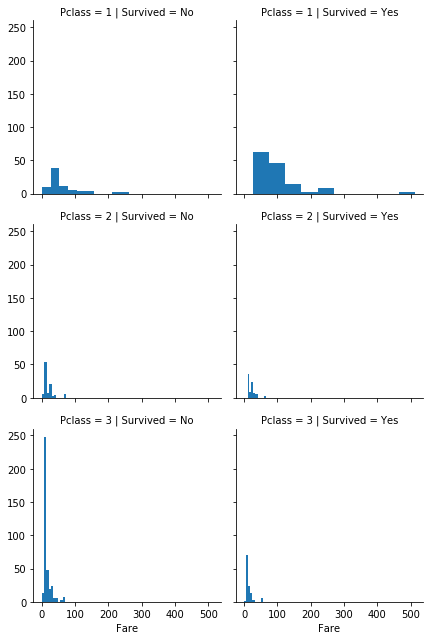

In [331]:
grid=sns.FacetGrid(df, row='Pclass', col='Survived')
grid.map(plt.hist,'Fare')
grid.add_legend()

Ler's comapre passengers from class 1 to the other passengers. Fewer passengers from Class 1 didn't survive if we compare to other classes and its seems like the only class where the numbers of survivors is much higher than the numbers succumbers.People from higher classes seem to have a high value fare. so there is also a relation between fare and survivor.

In [332]:
def plot_correlation_map(df):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink':.9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize':12 }
)

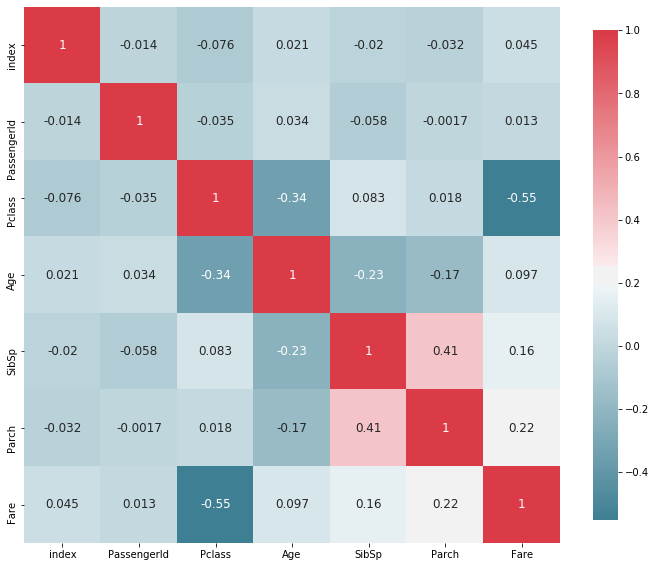

In [333]:
plot_correlation_map(df)

#analyse the function
The function displays us a sort of map where the columns and rows have the same data. They match the columns of our data frame.It seems like it compares the data of each feature to the other features to find a sort of relation between them. The further is the number is from 0 the clearer is the relation between two features. We can learn from this map that there is a relation between Fare and Pclass. This can be easily explained people from a higher class are wealthier and thus will pay for a better experience. Their Fare will be then higher than others.

In [334]:
df[['Pclass','Survived']].groupby(['Survived'],as_index=True).mean()

,Pclass
Survived,
No,2.531876
Yes,1.950292


Seems like those who survived are from higher classes.

In [338]:
df2=df["Name"].str.extract("([A-z]+)\\.")
df['Title']=df2
df=df.drop('Name',axis=1)

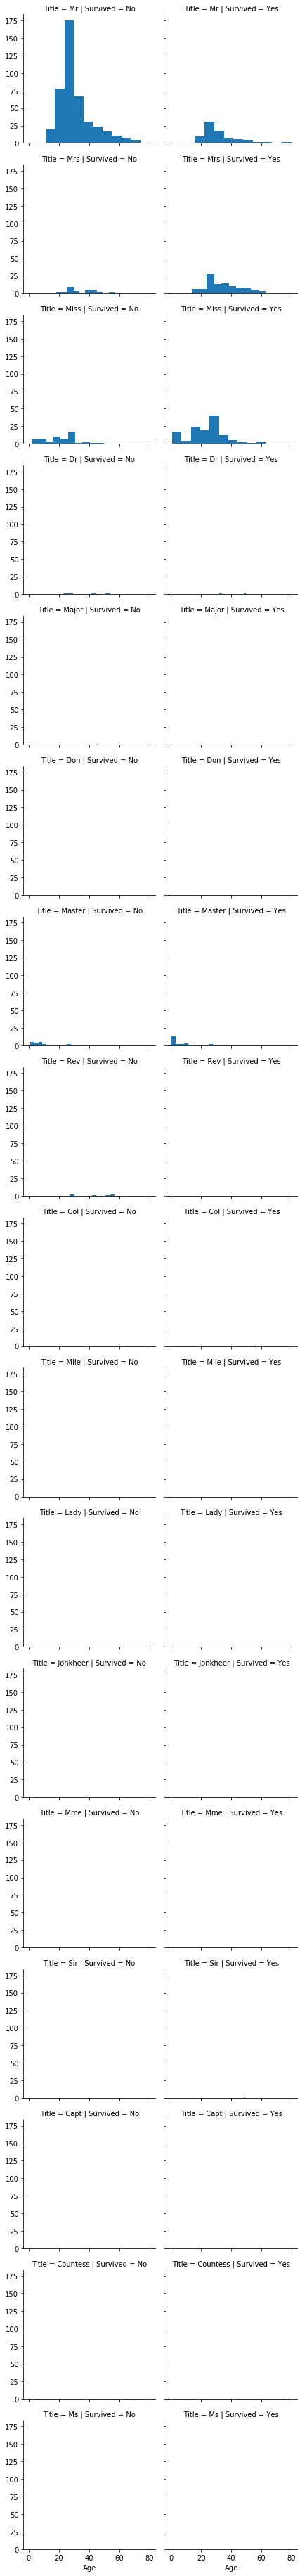

In [339]:
grid=sns.FacetGrid(df, row='Title', col='Survived')
grid.map(plt.hist,'Age')
grid.add_legend()
#We can't analyse anything, there are a lot of titles

In [354]:
Title_Dictionary={"Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                      "Dr":         "Officer",
                    "Rev":        "Officer" , 
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                   "Lady" :      "Royalty",
                  "the Countess" : "Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Miss",
                    "Mlle":       "Miss",
                    "Miss" :      "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mrs",
                    "Mrs" :       "Mrs",
                    "Master" :    "Master"}

df=df.replace({"Title":Title_Dictionary})
print(df['Title'].value_counts())


Mrs         643
Miss        185
Master       40
Officer      18
Royalty       4
Countess      1
Name: Title, dtype: int64


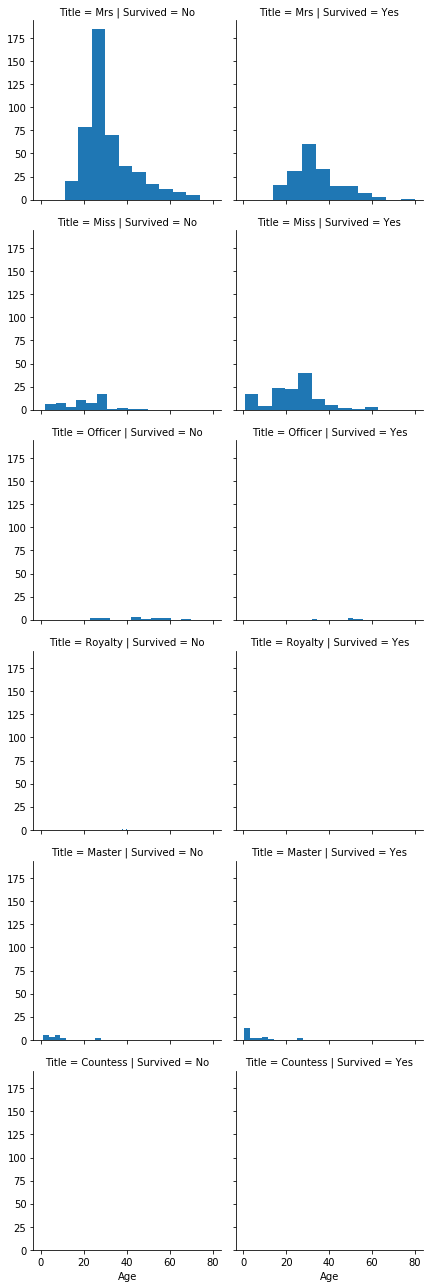

In [355]:
grid=sns.FacetGrid(df, row='Title', col='Survived')
grid.map(plt.hist,'Age')
grid.add_legend()

In [359]:
df['family_size']=df['Parch']+df['SibSp']
df

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,family_size
0,0,343,No,2,male,28.0,0,0,248740,13.0000,NaN,S,Mrs,0
1,1,76,No,3,male,25.0,0,0,348123,7.6500,F G73,S,Mrs,0
2,2,641,No,3,male,20.0,0,0,350050,7.8542,NaN,S,Mrs,0
3,3,568,No,3,female,29.0,0,4,349909,21.0750,NaN,S,Mrs,4
4,4,672,No,1,male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mrs,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,10,Yes,2,female,14.0,1,0,237736,30.0708,NaN,C,Mrs,1
887,887,61,No,3,male,22.0,0,0,2669,7.2292,NaN,C,Mrs,0
888,888,535,No,3,female,30.0,0,0,315084,8.6625,NaN,S,Miss,0
889,889,102,No,3,male,28.0,0,0,349215,7.8958,NaN,S,Mrs,0


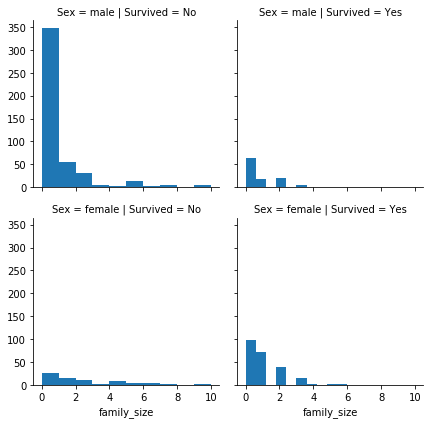

In [360]:
grid=sns.FacetGrid(df, row='Sex', col='Survived')
grid.map(plt.hist,'family_size')
grid.add_legend()

the feature doesnt seem to have any affect on the target